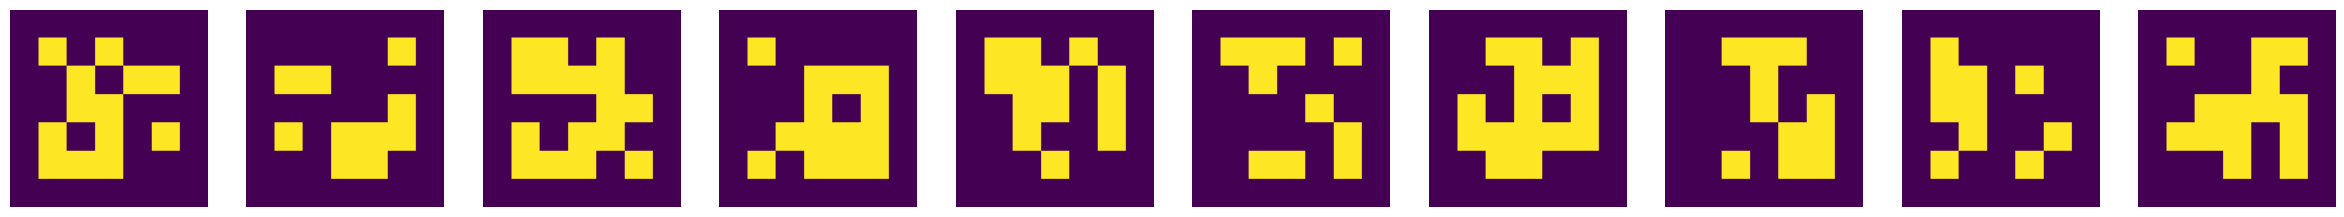

In [1]:
import cv2.aruco as aruco
import matplotlib.pyplot as plt

arucoDict = aruco.getPredefinedDictionary(aruco.DICT_5X5_100)
img_size = 500

plt.figure(figsize=(30, 3))

for id in range(0, 10):
    marker_img = aruco.generateImageMarker(arucoDict, id, img_size)
    plt.subplot(1,10, id + 1)
    plt.imshow(marker_img)
    plt.axis('off')
plt.show()

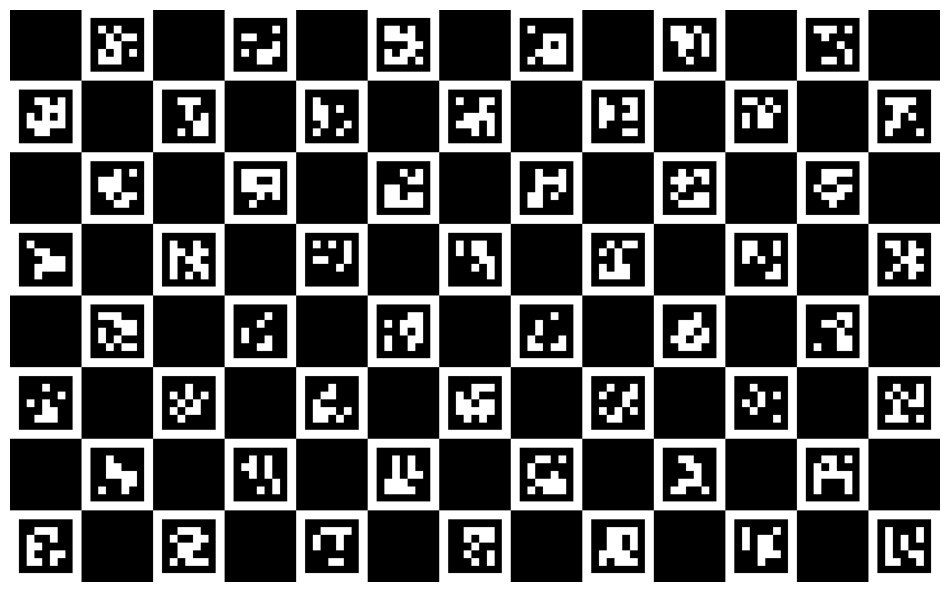

In [ ]:
import cv2
import numpy as np
import random

random.seed(42)

aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_5X5_100)
n_rows, n_cols = 8, 13
cell_size = 120     # marker + margin, or black cell
marker_size = 90    # marker
margin = (cell_size - marker_size) // 2

img_height = n_rows * cell_size
img_width = n_cols * cell_size
board_img = 255 * np.ones((img_height, img_width), dtype=np.uint8)

marker_id = 0

for row in range(n_rows):
    for col in range(n_cols):
        y = row * cell_size
        x = col * cell_size

        if (row + col) % 2 == 0:
            board_img[y:y+cell_size, x:x+cell_size] = 0
        else:
            marker_img = aruco.generateImageMarker(aruco_dict, marker_id, marker_size)
            y_offset = y + margin
            x_offset = x + margin
            board_img[y_offset:y_offset+marker_size, x_offset:x_offset+marker_size] = marker_img
            marker_id += 1

cv2.imwrite("board.png", board_img)

plt.figure(figsize=(12, 8))
plt.imshow(board_img, cmap='gray')
plt.axis('off')
plt.show()
